In [4]:
import numpy as np
import os
import pandas as pd
from matplotlib import mlab
import matplotlib.pyplot as plt

from src.data.make_dataset import BCIDataset
from src.visualization.plotting import plot_data, plot_data_logvar, plot_LDA
from src.data.signal_processing import best_csp_components, logvar, train_lda

%load_ext autoreload
%autoreload 2

In [63]:
# subjects = ["dani", "anna", "pablo"]
# measurements = ["2023-03-07_18-29-54", "2023-03-07_18-48-22", "2023-03-07_19-00-01_move",
#                 "2023-03-10_18-22-48", "2023-03-10_18-14-09", "2023-03-10_18-04-54_move",
#                 "2023-03-10_15-30-01_move", "2023-03-10_15-40-28", "2023-03-10_15-50-40"]

subjects = ["anna","nuria"]
measurements = ["2023-03-10_18-22-48", "2023-03-10_18-14-09", "2023-03-10_18-04-54_move",
                 "nuri_06"]

data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"

# Create dataset

In [64]:
trainingset = BCIDataset(data_root, subjects, measurements, measurement_length=3)

In [65]:
len(trainingset.data)

874

In [66]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample
0,anna,2023-03-10_18-22-48,arm_left,11,arm_left_11_1678469093.csv,Unnamed: 0 class time_in_s C...
1,anna,2023-03-10_18-22-48,arm_left,12,arm_left_12_1678469104.csv,Unnamed: 0 class time_in_s C...
2,anna,2023-03-10_18-22-48,arm_left,16,arm_left_16_1678469147.csv,Unnamed: 0 class time_in_s C...
3,anna,2023-03-10_18-22-48,arm_left,18,arm_left_18_1678469168.csv,Unnamed: 0 class time_in_s C...
4,anna,2023-03-10_18-22-48,arm_left,20,arm_left_20_1678469189.csv,Unnamed: 0 class time_in_s C...


# Preprocessing

## Validate data

In [91]:
trainingset.validate_data()

Total invalid samples: 15


## Filter data

In [92]:
trainingset.apply_bandpass_filtering(selected_data="sample")

# Create training data

In [93]:
mode = ["class_as_array","class_as_key"][1]
test_size = 0.2
#test_subjects = []
test_subjects = ["anna"]

In [96]:
training_data = trainingset.create_training_data(test_size, mode,best2components=True, test_subjects=test_subjects)

Split data using ['anna'] for testing.
Split dataset in 739 train and 120 test samples.
shape csp: (16, 375, 367)
COV with trace..
COV with trace..
shape Cr: (16, 16), shape Cl: (16, 16), shape Cc: (16, 16)
Used SVD
shape U: (16, 16), shape s: (16,)
shape P: (16, 16)
Used SVD
shape U: (16, 16), shape s: (16,)
Selected CSP components: [0, 15]


In [97]:
training_data.keys()

dict_keys(['train', 'test'])

In [98]:
training_data['test'].keys()

dict_keys(['arm_left', 'arm_right'])

In [99]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample,filtered,train_split,csp
0,anna,2023-03-10_18-22-48,arm_left,11,arm_left_11_1678469093.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,test,time_in_s CZ C4 T...
1,anna,2023-03-10_18-22-48,arm_left,12,arm_left_12_1678469104.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,test,time_in_s CZ C4 T...
2,anna,2023-03-10_18-22-48,arm_left,16,arm_left_16_1678469147.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,test,time_in_s CZ C4 T...
3,anna,2023-03-10_18-22-48,arm_left,18,arm_left_18_1678469168.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,test,time_in_s CZ C4 T...
4,anna,2023-03-10_18-22-48,arm_left,20,arm_left_20_1678469189.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,test,time_in_s CZ C4 T4...


# Apply LDA

In [100]:
print(np.shape(training_data['train']['arm_left']))
W, b = train_lda(class1 = training_data['train']['arm_left'], class2 = training_data['train']['arm_right'])

(372, 2)


In [101]:
print(np.shape(W))

(2,)


MIN: 4.424362924176791
Components: [0, 15]
Class 1: arm_left
Class 2: arm_right
shape: (372, 2)


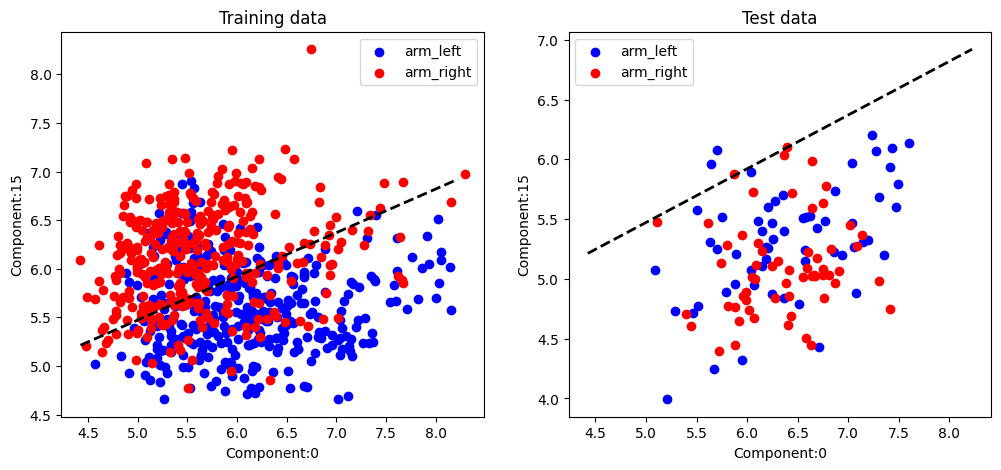

In [103]:
plot_LDA(training_data['train'], training_data['test'], b, W, trainingset.classes, trainingset.selected_csp_components)